# OpenJPEG Playground

In [1]:
import os, glob
import numpy as np
from PIL import Image

from ctypes import pointer,byref

from mamj2k import *

### Find/Load the C dynamically linked library wrapping OpenJPEG

In [2]:
mamj2k_path = ctypes.util.find_library('mamj2k')
print(f'Loading MAMJ2K library from {mamj2k_path}')
mj2k = cdll.LoadLibrary(mamj2k_path)

Loading MAMJ2K library from libmamj2k.dylib


### Get OpenJPEG version via the OpenJPEG wrapper

In [3]:
mj2k.mj2k_opj_version.restype = c_char_p
mj2k.mj2k_opj_version().decode('UTF-8')

'2.4.0'

### PIL Decompression of a .j2k file

In [ ]:
#pil = Image.load(j2k_filename)
#display(pil)

## Test Decompression of a JPEG2000 codestream

In [ ]:
j2k_filename = 'SampleImagery/p0_07.j2k'

with open(j2k_filename,'rb') as j2k_file:
    j2k = j2k_file.read()
    
mj2k.mj2k_parse_j2k.argtypes = [c_char_p,c_int64]
mj2k.mj2k_parse_j2k.restype = POINTER(MJ2K_IMAGE_T)
image_p = mj2k.mj2k_parse_j2k(j2k, len(j2k))
image = image_p.contents

image.display()

## Test Decompression of a .j2k file

In [ ]:
# use same j2k file as above

mj2k.mj2k_read_j2k.argtypes = [c_char_p]
mj2k.mj2k_read_j2k.restype = POINTER(MJ2K_IMAGE_T)
image_p = mj2k.mj2k_read_j2k(j2k_filename.encode('UTF-8'))
image = image_p.contents

image.display()

## Test Compression/Decompression of a Stock Image

### Load a Stock Image into PIL and extract the raster data

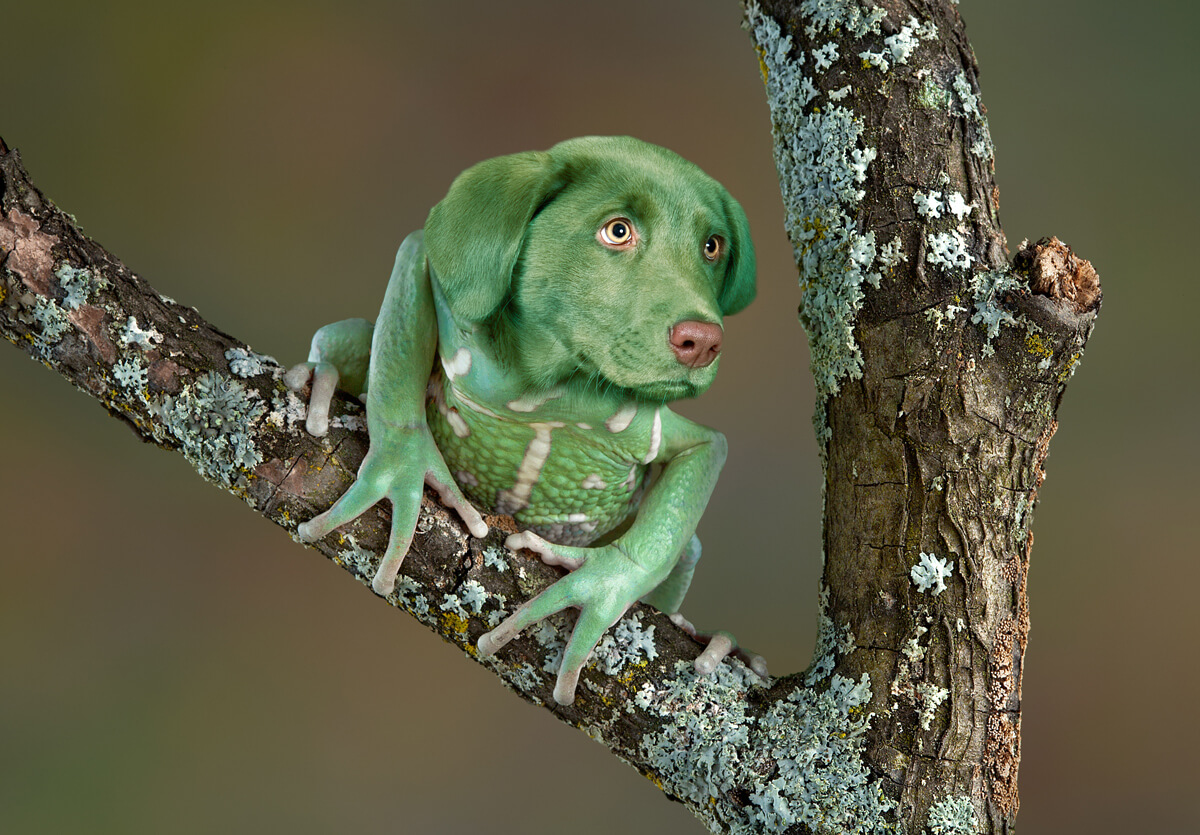

size: 835x1200


In [4]:
jpg_file = 'StockPhotos/frog_dog.jpg'
pil = Image.open(jpg_file)
display(pil)

(ncol,nrow) = pil.size
print(f'size: {nrow}x{ncol}')

r = np.array(pil.getdata(0),dtype=np.uint8).reshape((nrow,ncol))
g = np.array(pil.getdata(1),dtype=np.uint8).reshape((nrow,ncol))
b = np.array(pil.getdata(2),dtype=np.uint8).reshape((nrow,ncol))

In [5]:
mj2k.mj2k_write_j2k.argtypes = [POINTER(MJ2K_IMAGE_T), POINTER(MJ2K_CPARAM_T), c_char_p]
mj2k.mj2k_read_j2k.restype = ctypes.c_int

In [6]:
image = MJ2K_IMAGE_T()
image.rgb_from_array(r,g,b)

cparam = MJ2K_CPARAM_T()

j2k_root = os.path.splitext(jpg_file)[0]

### 2 Layer / PSNR=20 / NL Compression

In [ ]:
cparam.irreversible = 0
cparam.tcp_numlayers = 2
cparam.numresolution = 6
cparam.qual_type = 0
cparam.layer_qual_value[0] = 20
cparam.layer_qual_value[1] = 0
cparam.rsiz = 1

j2k_file = f'{j2k_root}_nl_cp2_psnr20.j2k'
j2k_file = c_char_p(j2k_file.encode('utf-8'))

mj2k.mj2k_write_j2k(image,cparam,j2k_file)

### 1 Layer / PSNR=30 / NL Compression

In [ ]:
cparam.irreversible = 0
cparam.tcp_numlayers = 1
cparam.numresolution = 6
cparam.qual_type = 0
cparam.layer_qual_value[0] = 30

j2k_file = f'{j2k_root}_nl_cp1_psnr30.j2k'
j2k_file = c_char_p(j2k_file.encode('utf-8'))

mj2k.mj2k_write_j2k(image,cparam,j2k_file)

### 1 Layer / PSNR=20 / NL Compression

In [ ]:
cparam.irreversible = 0
cparam.tcp_numlayers = 1
cparam.numresolution = 6
cparam.qual_type = 0
cparam.layer_qual_value[0] = 20

j2k_file = f'{j2k_root}_nl_cp1_psnr20.j2k'
j2k_file = c_char_p(j2k_file.encode('utf-8'))

mj2k.mj2k_write_j2k(image,cparam,j2k_file)

### 2 Layer / PSNR=20 / VL Compression

In [ ]:
cparam.irreversible = 1
cparam.tcp_numlayers = 2
cparam.numresolution = 6
cparam.qual_type = 0
cparam.layer_qual_value[0] = 20
cparam.layer_qual_value[1] = 0

j2k_file = f'{j2k_root}_vl_cp2_psnr20.j2k'
j2k_file = c_char_p(j2k_file.encode('utf-8'))

mj2k.mj2k_write_j2k(image,cparam,j2k_file)

### 1 Layer / PSNR=30 / VL Compression

In [ ]:
cparam.irreversible = 1
cparam.tcp_numlayers = 1
cparam.numresolution = 6
cparam.qual_type = 0
cparam.layer_qual_value[0] = 30

j2k_file = f'{j2k_root}_vl_cp1_psnr30.j2k'
j2k_file = c_char_p(j2k_file.encode('utf-8'))

mj2k.mj2k_write_j2k(image,cparam,j2k_file)

### Decompress J2K Files

In [ ]:
j2k_files = glob.glob(f'{j2k_root}*.j2k')
j2k_files.sort()

mj2k.mj2k_read_j2k.argtypes = [c_char_p]
mj2k.mj2k_read_j2k.restype = POINTER(MJ2K_IMAGE_T)

for j2k_file in j2k_files:
    print(j2k_file)
    
    image_p = mj2k.mj2k_read_j2k(j2k_file.encode('UTF-8'))
    image = image_p.contents

    image.display()